## 3. Carrier Action


### 3.1.2 Drift current
Pierret, hole drift current, 
$$I_{P|drift}=qpv_dA$$
$$J_{P|drift}=qpv_d$$
mu0: the constant of proportionality between vd and e-field at low to moderate electric fields
$$v_d=\frac{\mu_0 \varepsilon}{\left[1+\left(\frac{\mu_0 \varepsilon}{v_{sat}}\right)^\beta \right]^{1/\beta}}$$
$$\mu_0 \varepsilon . . . \varepsilon \rightarrow 0$$
$$v_d . . . \varepsilon \rightarrow \infty$$
low field limit
$$J_{P|drift}=q\mu_p p\varepsilon$$
$$J_{N|drift}=q\mu_n n\varepsilon$$
Baligar, At low doping levels, the average mobility($\mu^{av}$) for electrons can be related to the electric field(E) by:
Just as mobility of the electrons and holes changes with temperature, the saturated drift velocity is also a function of temperature.

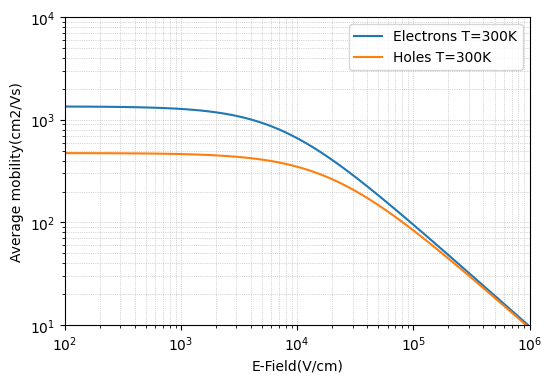

In [12]:
import numpy as np, matplotlib.pyplot as plt

Efield=np.logspace(2,6,101)
munav=9.85e6/(1.04e5+Efield**1.3)**0.77
mupav=8.91e6/(1.41e5+Efield**1.2)**0.83

plt.figure(figsize=(6,4))
plt.loglog(Efield,munav, label="Electrons T=300K")
plt.loglog(Efield,mupav, label="Holes T=300K")
plt.xlim(1e2, 1e6), plt.ylim(10,1e4)
plt.xlabel("E-Field(V/cm)"), plt.ylabel("Average mobility(cm2/Vs)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

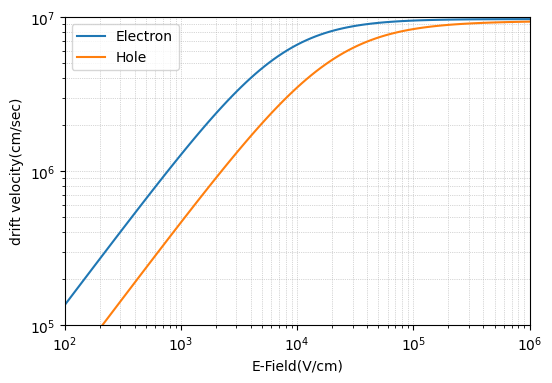

In [64]:
#Baligar pp39
import numpy as np, matplotlib.pyplot as plt

Temp=300
Efield=np.logspace(2,6,101)

vdn=9.85e6*Efield/(1.04e5+Efield**1.3)**0.77
vdp=8.91e6*Efield/(1.41e5+Efield**1.2)**0.83

plt.figure(figsize=(6,4))
plt.loglog(Efield,vdn,label="Electron")
plt.loglog(Efield,vdp,label="Hole")
plt.xlim(1e2, 1e6), plt.ylim(1e5,1e7)
plt.xlabel("E-Field(V/cm)"), plt.ylabel("drift velocity(cm/sec)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

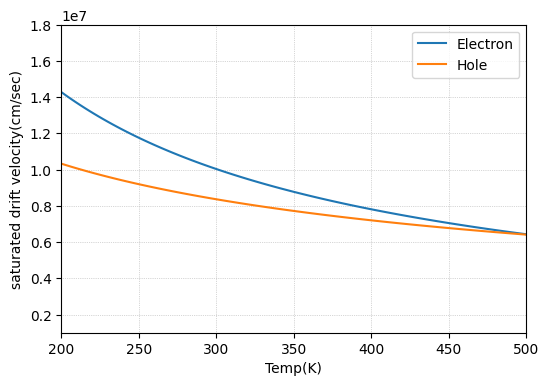

In [73]:
#Baligar pp40
import numpy as np, matplotlib.pyplot as plt

Temp=np.linspace(200,500,101)

vsatn=1.434e9*Temp**-0.87
vsatp=1.624e8*Temp**-0.52

plt.figure(figsize=(6,4))
plt.plot(Temp,vsatn,label="Electron")
plt.plot(Temp,vsatp,label="Hole")
plt.xlim(200, 500), plt.ylim(1e6,1.8e7)
plt.xlabel("Temp(K)"), plt.ylabel("saturated drift velocity(cm/sec)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

### 3.1.3 Mobility
$$\mu=\mu_{min}+\frac{\mu_0}{1+(N/N_{ref})^\alpha}$$
$$A=A_{300}\left(\frac{T}{300}\right)^\eta$$

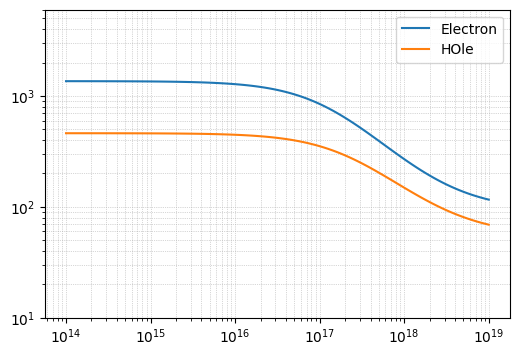

In [3]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni
import numpy as np, matplotlib.pyplot as plt

Temp=300
NDref=1.3e17; munmin=92; mun0=1268; an=0.91
NAref=2.35e17; mupmin=54.3; mup0=406.9; ap=0.88

NB=np.logspace(14,19,101)

mun=munmin+mun0/(1+(NB/NDref))**an
mup=mupmin+mup0/(1+(NB/NAref))**ap

plt.figure(figsize=(6,4))
plt.loglog(NB,mun, label="Electron")
plt.loglog(NB,mup, label="HOle")
plt.ylim(10,6000)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

### Problem 3.3

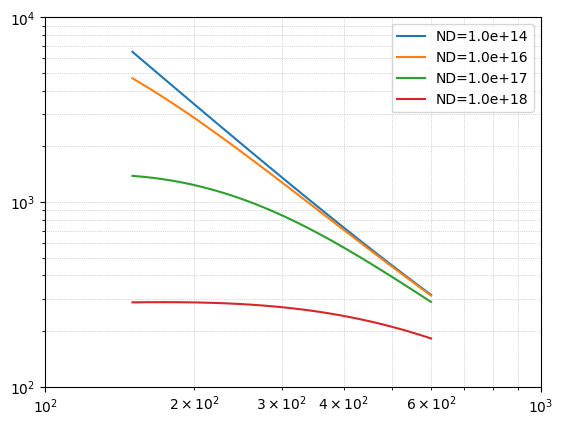

In [18]:
# Problem 3.3
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni
import numpy as np, matplotlib.pyplot as plt

NB=[1e14,1e16,1e17,1e18]
NDref=1.3e17; munmin=92; mun0=1268; an=0.91
NAref=2.35e17; mupmin=54.3; mup0=406.9; ap=0.88
TNref=2.4; Tmumin=-0.57; Tmun0=-2.33; Tmup0=-2.23; Ta=-0.146

Temp=np.linspace(150,600,101)

NDrefT=NDref*(Temp/300)**TNref
munminT=munmin*(Temp/300)**Tmumin
mun0T=mun0*(Temp/300)**Tmun0
anT=an*(Temp/300)**Ta

NArefT=NAref*(Temp/300)**TNref
mupminT=mupmin*(Temp/300)**Tmumin
mup0T=mup0*(Temp/300)**Tmup0
apT=ap*(Temp/300)**Ta

for i in NB:
    mun=munminT+mun0T/(1+(i/NDrefT))**anT
    plt.loglog(Temp,mun,label=f"ND={i:.1e}")
    #mup=mupminT+mup0T/(1+(i/NArefT))**apT
    #plt.loglog(Temp,mup,label=f"NA={i:.1e}")
plt.xlim(100,1000), plt.ylim(100,10000)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

### Problem 3.5

In [69]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,resistivityn
T=300
ND=1e14
print(mun(T,ND))
print(resistivityn(T,ND))

1359.1130515584553
45.92295841335011


In [74]:
# intrinsic semiconductor n=p=ni
# rho=1/(q(mun+mup)*ni)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
T=300
n=ni(T)
p=ni(T)
rho=1/(q*(mun(T,n)+mup(T,p))*ni(T))
print(mun(T,n),mup(T,p),ni(T),f"{rho:.2e}")

1359.999911199095 461.1999847558712 10004609206.989506 3.43e+05


In [12]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt
T=300
#Nconc=np.linspace(1e14,1e18,8)
NB=np.logspace(14,18,5)
for i in NB:
    mu=mun(T,i)
    print(f"{T},{i:.2e},{mu:.2f}")
    #print(T,i,mu)

300,1.00e+14,1359.11
300,1.00e+15,1351.19
300,1.00e+16,1277.31
300,1.00e+17,846.46
300,1.00e+18,269.22


### 3.1.4 Resistivity
$$\varepsilon=\rho J$$
$$J=\sigma \varepsilon =\frac{1}{\rho}\varepsilon$$
$$J_drift=J_{N|drift}+J_{P|drift}=q(\mu_n n+\mu_p p)\varepsilon$$
$$\rho=\frac{1}{q(\mu_n n+\mu_p p)}$$
$$ n-type, \rho_n=\frac{1}{q\mu_n N_D}$$
$$ p-type, \rho_p=\frac{1}{q\mu_p N_A}$$
$$ intrinsic,\ \rho_{intrinsic}=\frac{1}{q(\mu_n+\mu_p)n_i}$$
$$ max,\ \rho_{max}=\frac{1}{2q\sqrt{\mu_n \mu_p}\ n_i}$$

### Problem 3.7

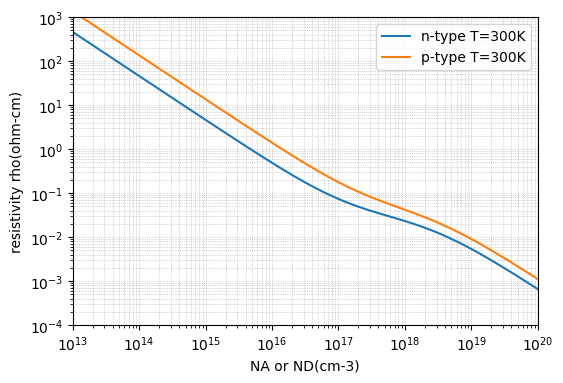

In [20]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
NB=np.logspace(13,20,101)
rhon=1/(q*mun(T,NB)*NB)
rhop=1/(q*mup(T,NB)*NB)

plt.figure(figsize=(6,4))
plt.loglog(NB,rhon,label="n-type T=300K")
plt.loglog(NB,rhop,label="p-type T=300K")
plt.xlim(1e13, 1e20), plt.ylim(1e-4,1e3)
plt.xlabel("NA or ND(cm-3)"), plt.ylabel("resistivity rho(ohm-cm)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

### Problem 3.9

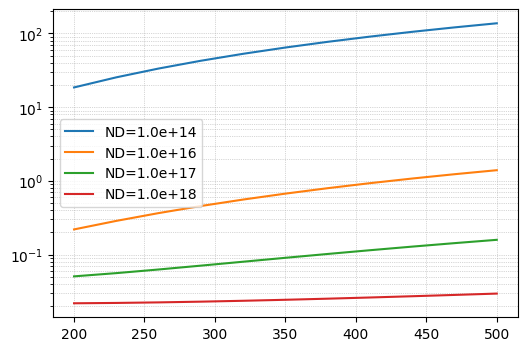

In [16]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=np.linspace(200,500,11)
NB=[1e14,1e16,1e17,1e18]

plt.figure(figsize=(6,4))
for i in NB:
    rhon=1/(q*mun(T,i)*i)
    rhop=1/(q*mup(T,i)*i)
    plt.semilogy(T,rhon,label=f"ND={i:.1e}")
    #plt.semilogy(T,rhop,label=f"NA={i:.1e}")
#plt.xlim(200, 500), plt.ylim(1e-4,1e3)
#plt.xlabel("NA or ND(cm-3)"), plt.ylabel("resistivity rho(ohm-cm)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()


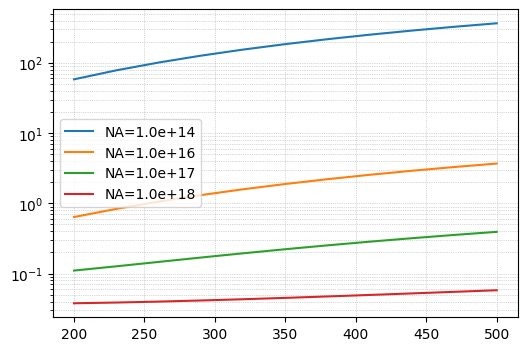

In [15]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=np.linspace(200,500,11)
NB=[1e14,1e16,1e17,1e18]

plt.figure(figsize=(6,4))
for i in NB:
    rhon=1/(q*mun(T,i)*i)
    rhop=1/(q*mup(T,i)*i)
    #plt.semilogy(T,rhon,label=f"ND={i:.1e}")
    plt.semilogy(T,rhop,label=f"NA={i:.1e}")
#plt.xlim(200, 500), plt.ylim(1e-4,1e3)
#plt.xlabel("NA or ND(cm-3)"), plt.ylabel("resistivity rho(ohm-cm)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()


In [159]:
rho=1/(q*mun(300,1e16)*1e16)

print(f"{rho:.2f}")
print(f"rho={rho:.2f}")
print(f"rho={rho}")
print(rho)

0.49
rho=0.49
rho=0.48864091773831614
0.48864091773831614


### Problem 3.5

In [26]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt

T=300
ND=1e14
NA=1e14
ni=ni(T)
mun=mun(T,ND)
mup=mup(T,NA)
rho=1/(q*(mun+mup)*ni) #In an intrinsic semiconductor n=p=ni
rhomax=1/(2*q*np.sqrt(mun*mup)*ni) #Problem 3.5 (b)

print(f"T={T}, ND={ND:.2e}, NA={NA:.2e}, mun={mun:.2f}, mup={mup:.2f}, ni={ni:.2e}, rho={rho:.2e}, rhomax={rhomax:.2e}")


T=300, ND=1.00e+14, NA=1.00e+14, mun=1359.11, mup=461.05, ni=1.00e+10, rho=3.43e+05, rhomax=3.94e+05


### Problem 3.6

In [48]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt
T=300
NB=1e16
mun=mun(T,NB); mup=mup(T,NB)
print(mun,mup)
rhon=1/(q*mun*NB);rhop=1/(q*mup*NB) 
print(rhon,rhop)

1277.3079347232522 446.54846652594296
0.48864091773831614 1.3977092482554576


In [53]:
# the silicon sample is "compensated" by adding NA=1e16 acceptors.
# NA=ND=1e16, n=p=ni=1e10, ND+NA=2e16, Moreover, the total number of scattering centers is ND+NA=2e16/cm3.
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt
mun=mun(300,2e16); mup=mup(300,2e16)
rho_compensated=1/(q*(mun+mup)*ni(T))
print(rho_compensated)

380828.6110307821


In [58]:
# compute the resistitivy of intrinsic(NA=ND=0) silicon at room temp.
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup
import numpy as np, matplotlib.pyplot as plt
mun=mun(300,1e14); mup=mup(300,1e14)
rho_compensated=1/(q*(mun+mup)*ni(T))
print(rho_compensated)

342748.50483549497


In [59]:
# R=rho*l/A
R=500
A=1e-2
l=1
rho=R*A/l
print(rho)

5.0


### Problem 3.8
formation of the layer by diffusion or ion implantation is likely to give rise to a doping concentration that varies with depth into the layer.
W, L, d, ND(x) variaation with the depth x from the wafer surface.
$$R=\frac{L}{W}\left[\frac{1}{q\int_{0}^{d} \mu_n(x)N_D(x)dx}\right]$$
$$N_D(x)=N_{D0}exp(-ax)+N_{DB}$$
ND0=1e14<ND0<1e18, L=W, NDB=1e14, d=5um, 1/a=1um(???)\
conductance of a small section dG 
$$dG=d(1/R)=\frac{Wdx}{\rho L}=\frac{W}{L}q\mu_nN_Ddx$$
$$G=\sigma dG=\int_0^d \frac{W}{L}q\mu_n N_D dx\quad or\quad R=1/G=\frac{L}{W}\frac{1}{q\int_0^d \mu_n N_D dx}$$
***중요한 것은** R->1/(qdmu_n*N_DB)가 된다.

Resistance for ND0 = 1e14: 7.6807e+04 Ohm
Resistance2 for ND0 = 1e14: 4.6103e+04 Ohm
R_trapz for ND0 = 1e14: 7.6805e+04 Ohm
R_trapz2 for ND0 = 1e14: 4.6103e+04 Ohm


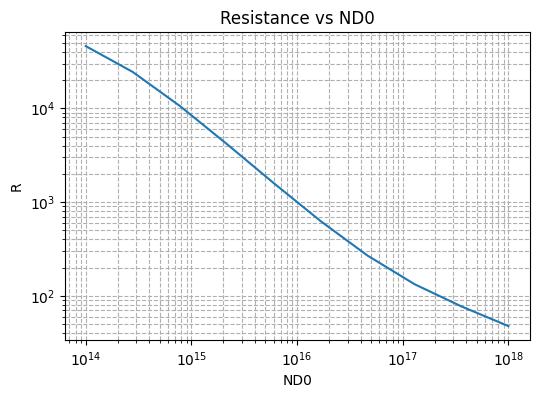

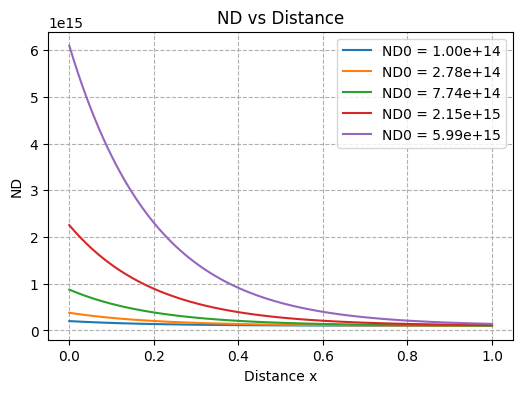

In [27]:
import numpy as np
from scipy.integrate import quad, trapezoid
import matplotlib.pyplot as plt

# Constants and resistor parameters
q = 1.6e-19
ND0 = np.logspace(14, 18,10)
NDB=1e14
d = 5e-4

# Resistance calculation
def Rintg(x, ND0_i):
    #NDB = 2e14
    ND = NDB + ND0_i * np.exp(-5 * x)
    
    # Mobility calculation
    munmin = 92
    mun0 = 1268
    NDref = 1.3e17
    an = 0.91
    mun = munmin + mun0 / (1 + (ND / NDref) ** an)
    
    # Integrand
    return mun * ND

R = []
for ND0_i in ND0:
    integral, _ = quad(Rintg, 0, d, args=(ND0_i,))
    R.append(1 / (q * 1 * integral))

# quad 
ND0_specific = NDB
integral_specific, _ = quad(Rintg, 0, 1, args=(ND0_specific,))
R_specific = 1 / (q * d * integral_specific)
print(f'Resistance for ND0 = 1e14: {R_specific:.4e} Ohm')

integral_specific2, _ = quad(Rintg, 0, d, args=(ND0_specific,))
R_specific2 = 1 / (q * 1 * integral_specific2)
print(f'Resistance2 for ND0 = 1e14: {R_specific2:.4e} Ohm')

# trapzoid
x_vals = np.linspace(0, 1, 100)  # Discretize x for trapezoidal integration
y_vals = np.array([Rintg(x, ND0_specific) for x in x_vals])  # Evaluate function
integral_trapz = trapezoid(y_vals, x_vals)  # Compute integral
R_trapz = 1/(q*d*integral_trapz) # Compute resistance
print(f'R_trapz for ND0 = 1e14: {R_trapz:.4e} Ohm')

x_vals2 = np.linspace(0, d, 100)  # Discretize x for trapezoidal integration
y_vals2 = np.array([Rintg(x, ND0_specific) for x in x_vals2])  # Evaluate function
integral_trapz2 = trapezoid(y_vals2, x_vals2)  # Compute integral
R_trapz2 = 1/(q*1*integral_trapz2) # Compute resistance
print(f'R_trapz2 for ND0 = 1e14: {R_trapz2:.4e} Ohm')

# Plotting resistance result
plt.figure(figsize=(6, 4))
plt.loglog(ND0, R)
plt.grid(True, which="both", linestyle="--")
plt.xlabel('ND0')
plt.ylabel('R')
plt.title('Resistance vs ND0')
plt.show()

# Plot ND as a function of distance x
x_values = np.linspace(0, 1, 100)
ND_plots = {ND0_i: [NDB + ND0_i * np.exp(-5 * x) for x in x_values] for ND0_i in ND0[:5]}  # Plot for first 5 ND0 values

plt.figure(figsize=(6, 4))
for ND0_i, ND_values in ND_plots.items():
    plt.plot(x_values, ND_values, label=f'ND0 = {ND0_i:.2e}')

plt.grid(True, which="both", linestyle="--")
plt.xlabel('Distance x')
plt.ylabel('ND')
plt.title('ND vs Distance')
plt.legend()
plt.show()


In [1]:
import numpy as np
from scipy.integrate import quad, trapezoid
import matplotlib.pyplot as plt

# Constants and parameters
q = 1.6e-19  # Electron charge in Coulombs
ND0 = np.logspace(14, 18, num=50)  # ND0 values spanning 10^14 to 10^18
d = 5e-4  # Thickness in cm
NDB = 1e14

# Function to compute integrand for resistance
def Rintg(x, ND0_i):
    #NDB = 1e13  # Background doping concentration
    ND = NDB + ND0_i * np.exp(-5 * x)  # Doping profile
    
    # Mobility calculation (empirical model)
    munmin = 92
    mun0 = 1268
    NDref = 1.3e17
    an = 0.91
    mun = munmin + mun0 / (1 + (ND / NDref) ** an)  # Mobility model
    
    # Resistivity integrand (since R = ∫ (1 / qμND) dx)
    return q * mun * ND

# Calculate resistance for ND0 = 1e14 specifically
ND0_specific = 1e14
integral_specific, _ = quad(Rintg, 0, 1, args=(ND0_specific,))
R_specific = 1/( integral_specific * d)
print(f'Resistance for ND0 ={NDB:.2e}: {R_specific:.4e} Ohm')

integral_specific2, _ = quad(Rintg, 0, d, args=(ND0_specific,))
R_specific2 = 1/integral_specific2
print(f'Resistance2 for ND0 ={NDB:.2e}: {R_specific2:.4e} Ohm')

x_vals = np.linspace(0, 1, 100)  # Discretize x for trapezoidal integration
y_vals = np.array([Rintg(x, ND0_specific) for x in x_vals])  # Evaluate function
integral_trapz = trapezoid(y_vals, x_vals)  # Compute integral
R_trapz = 1/(integral_trapz * d)  # Compute resistance
print(f'R_trapz for ND0 ={NDB:.2e}: {R_trapz:.4e} Ohm')

x_vals2 = np.linspace(0, d, 100)  # Discretize x for trapezoidal integration
y_vals2 = np.array([Rintg(x, ND0_specific) for x in x_vals2])  # Evaluate function
integral_trapz2 = trapezoid(y_vals2, x_vals2)  # Compute integral
R_trapz2 = 1/ integral_trapz2 # Compute resistance
print(f'R_trapz2 for ND0 ={NDB:.2e}: {R_trapz2:.4e} Ohm')


Resistance for ND0 =1.00e+14: 7.6807e+04 Ohm
Resistance2 for ND0 =1.00e+14: 4.6103e+04 Ohm
R_trapz for ND0 =1.00e+14: 7.6805e+04 Ohm
R_trapz2 for ND0 =1.00e+14: 4.6103e+04 Ohm


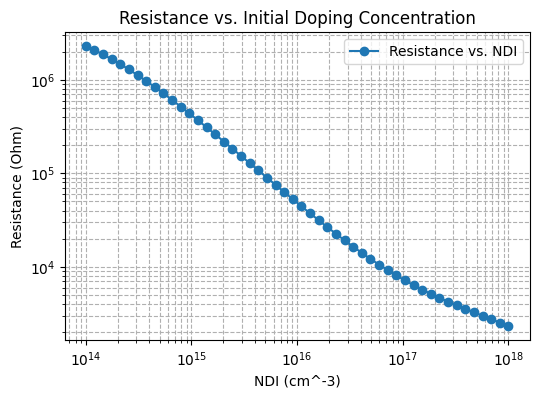

In [25]:
from constant import q, mun, Resistance  # Ensure mun is properly defined
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

T = 300  # Temperature in K
NDB = 1e14  # Bulk concentration
NDI_values = np.logspace(14, 18, num=50, base=10)  # Corrected logspace
L = 100e-4  # 100 µm
W = 10e-4   # 10 µm
d = 1e-4    # Thickness in cm

R_values = []  # Store results
for NDI in NDI_values:
    R_values.append(Resistance(T, NDB, NDI, L, W, d))

plt.figure(figsize=(6, 4))
plt.loglog(NDI_values, R_values, marker='o', label="Resistance vs. NDI")
plt.xlabel("NDI (cm^-3)")
plt.ylabel("Resistance (Ohm)")
plt.title("Resistance vs. Initial Doping Concentration")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


In [13]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,conductivityn
import numpy as np, matplotlib.pyplot as plt

T=300
ND=1e17
L=100*1e-4
W=10*1e-4
d=1*1e-4
conductivity=q*mun(T,ND)*ND
resistivity=1/conductivity
sheet_resistance=resistivity/d
resistance=L/W*sheet_resistance
print(f'conductivity={conductivity:.2f},resistivity={resistivity:.2f},sheet_resistance={sheet_resistance:.2f},resistance={resistance:.2f}')


conductivity=13.56,resistivity=0.07,sheet_resistance=737.36,resistance=7373.60


In [6]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt
T=300
NB=1e17
L=100*1e-4
W=10*1e-4
d=1*1e-4
print(resistancep(T,NB,L,W,d))

17724.169312875783


### Problem 3.10

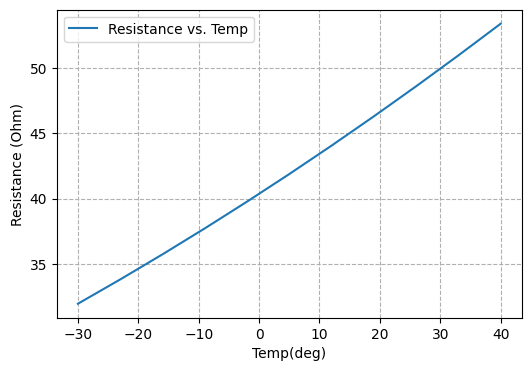

In [32]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

ND=1e16
L=1 #1cm
W=0.1 #1mm
d=0.1 #1mm
A=W*d
Temp=np.linspace(-30,40,11)
T=273.18+Temp
R=L/A/(q*mun(TempK,ND)*ND)

plt.figure(figsize=(6, 4))
plt.plot(Temp, R, label="Resistance vs. Temp")
plt.xlabel("Temp(deg)")
plt.ylabel("Resistance (Ohm)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


### Problem 3.11

In [44]:
# KE_peak=0.5*m_star*v_peak^2=Epeak-Ec=kT/2 probelm 2.7
# setting m_star=m0, vpeak=sqrt(kT/m0)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt
T=300
vpeak=np.sqrt(kB*T/m0)
print(kB,T,m0,vpeak,f"{vpeak*1e2: .2e}cm/sec")
# m0가 들어가는 수식은 kB 볼츠만 상수를 써야 하며, 단위는 kg, m가 되고 나중에 cm로 바꾸어야 한다.

1.380662e-23 300 9.1095e-31 67430.60297583608  6.74e+06cm/sec


### Probelm 3.14
Diffusion coefficient를 구하여 보자.

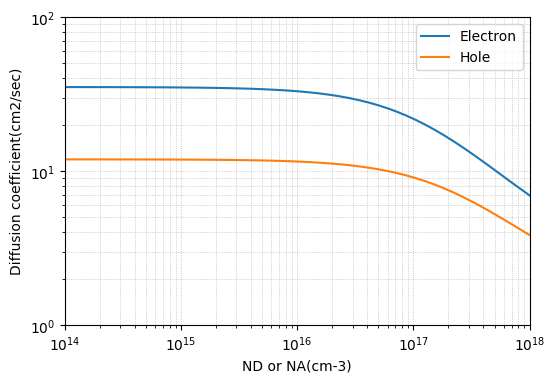

In [49]:
# D=(kT/q)*mu
# Diffusion coefficient vs NA or ND
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300
NB=np.logspace(14,18)

Dn=k*T*mun(T,NB)
Dp=k*T*mup(T,NB)

plt.figure(figsize=(6,4))
plt.loglog(NB,Dn, label="Electron")
plt.loglog(NB,Dp, label="Hole")
plt.xlabel("ND or NA(cm-3)"), plt.ylabel("Diffusion coefficient(cm2/sec)")
plt.xlim(1e14, 1e18), plt.ylim(1,100)
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.legend()
plt.show()

# at room temperature, Si becomes degenerate for doping concentrations in excess of roughly 1e18/cm3


### Problem 3.24

$$n=n_i\ exp(\frac{F_N-E_i}{kT})\ or\ F_N=E_i+kT\ ln(\frac{n}{n_i})$$
n-type, illumination of a n-type semiconductor bar, steady state, excess hole concentration of
$$\Delta p_n(x)=\Delta p_{n0} exp(-x/L_P)$$
Given the prevailing low-level injection conditions, noting that $p=p_0+\Delta p$
$$n=n0\ ,\ p=p0 + \Delta p_{n0} exp(-x/L_P)$$
if $\Delta p_n(x)>>p0$
$$F_P=E_i-kTln(\Delta P_{n0}/n_i)+kTln(x/L_P)$$

In [63]:
# before illumination, n-type, EF-Ei=0.3eV, after illumination FN-Ei=0.318eV, Ei-EP=0.3V
# n0,p0,n,p,ND,resistivity_before and after

from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt
T=300
DeltaE=0.3 #EF-Ei
DeltaEn=0.318
DeltaEp=0.3
#equilibrium
n0=ni(T)*np.exp(DeltaE/(k*T))
p0=ni(T)*np.exp(-DeltaE/(k*T))
#illumination
n=ni(T)*np.exp(DeltaEn/(k*T))
p=ni(T)*np.exp(DeltaEp/(k*T))
# ND~n0
ND=n0
# resistivity
mun=1345; mup=458
rho_before=1/(q*mun*ND) #ohm-cm
rho_after=1/(q*mun*n + q*mup*p)

print(f"n0={n0:.2e}, p0={p0:.2e}, n={n:.2e}, p={p:.2e}, ND={ND:.2e}, rho_before={rho_before:.2f}, rho_after={rho_after:.2f}")

n0=1.10e+15, p0=9.12e+04, n=2.20e+15, p=1.10e+15, ND=1.10e+15, rho_before=4.23, rho_after=1.80


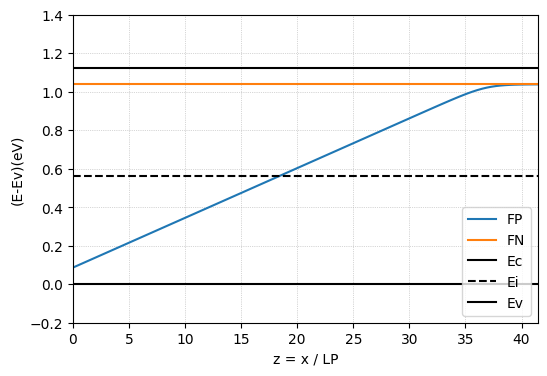

In [3]:
# (E-Ev)/kT(Ev=-5 ~ Ec=45) vs x/LP(0 ~ 16)
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

T=300
ND=1e18 #cm-3
Delta_pn0=1e18 #cm-3
p0=ni(T)**2/ND
zmax=np.log(100*Delta_pn0/p0)
z=np.linspace(0,zmax,101) #z=x/LP

Ec=Eg(T)
Ei=Eg(T)/2
Ev=0
FN=Eg(T)/2+np.log(ND/ni(T))*k*T
FP=Eg(T)/2-np.log(p0/ni(T)+Delta_pn0/ni(T)*np.exp(-z))*k*T

plt.figure(figsize=(6,4))
plt.plot(z, FP, label="FP")
plt.plot(z, FN * np.ones_like(z), label="FN")  # 일정한 FN 값을 z에 대해 플로팅
plt.plot(z, Ec * np.ones_like(z), 'k-', label="Ec")
plt.plot(z, Ei * np.ones_like(z), 'k--', label="Ei")
plt.plot(z, Ev * np.ones_like(z), 'k-', label="Ev")
plt.xlabel("z = x / LP"), plt.ylabel("(E-Ev)(eV)")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.xlim(0, zmax), plt.ylim(-0.2,1.4)
plt.legend()
plt.show()
